In [1]:
import numpy as np
import pandas as pd
from sklearn import datasets
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap
import matplotlib.patches as mpatches
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import f1_score
from sklearn.metrics import confusion_matrix
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
%matplotlib inline

# Problem 1

In [2]:
dataset = datasets.load_iris()
df_data = pd.DataFrame(dataset.data, columns = dataset.feature_names).loc[:, ["sepal length (cm)", "petal length (cm)"]]
print(df_data)

     sepal length (cm)  petal length (cm)
0                  5.1                1.4
1                  4.9                1.4
2                  4.7                1.3
3                  4.6                1.5
4                  5.0                1.4
..                 ...                ...
145                6.7                5.2
146                6.3                5.0
147                6.5                5.2
148                6.2                5.4
149                5.9                5.1

[150 rows x 2 columns]


In [3]:
df_species = pd.DataFrame(dataset.target, columns = ['species'])
df = df_data.join(df_species)
df_species = df_species[df_species['species'].isin([1, 2])]
print(df_species)

     species
50         1
51         1
52         1
53         1
54         1
..       ...
145        2
146        2
147        2
148        2
149        2

[100 rows x 1 columns]


# Problem 2

In [4]:
df = df[df["species"].isin([1, 2])]
sns.set_theme(style = "whitegrid")

Text(0.5, 0.98, 'Petal length')

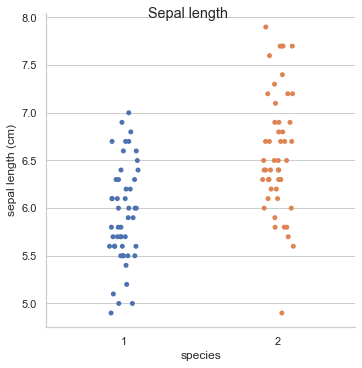

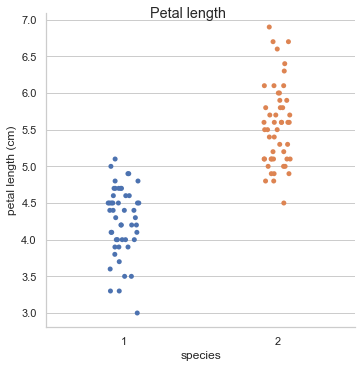

In [5]:
# Scatter plot
scatter_plot_sepal = sns.catplot(x = "species", y = "sepal length (cm)", data = df)
scatter_plot_sepal.fig.suptitle("Sepal length")
scatter_plot_petal = sns.catplot(x = "species", y = "petal length (cm)", data = df)
scatter_plot_petal.fig.suptitle("Petal length")

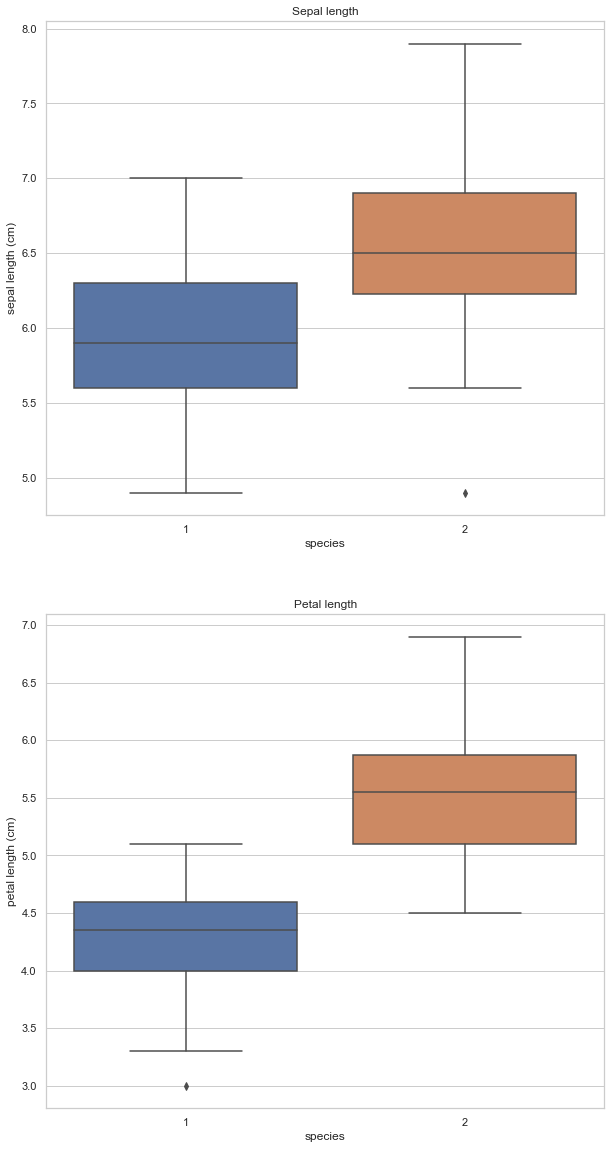

In [6]:
# Box plot
_, axes = plt.subplots(2, 1, figsize = (10,20))
box_plot_sepal = sns.boxplot(ax = axes[0], x = "species", y = "sepal length (cm)", data = df).set_title("Sepal length")
box_plot_petal = sns.boxplot(ax = axes[1], x = "species", y = "petal length (cm)", data = df).set_title("Petal length")

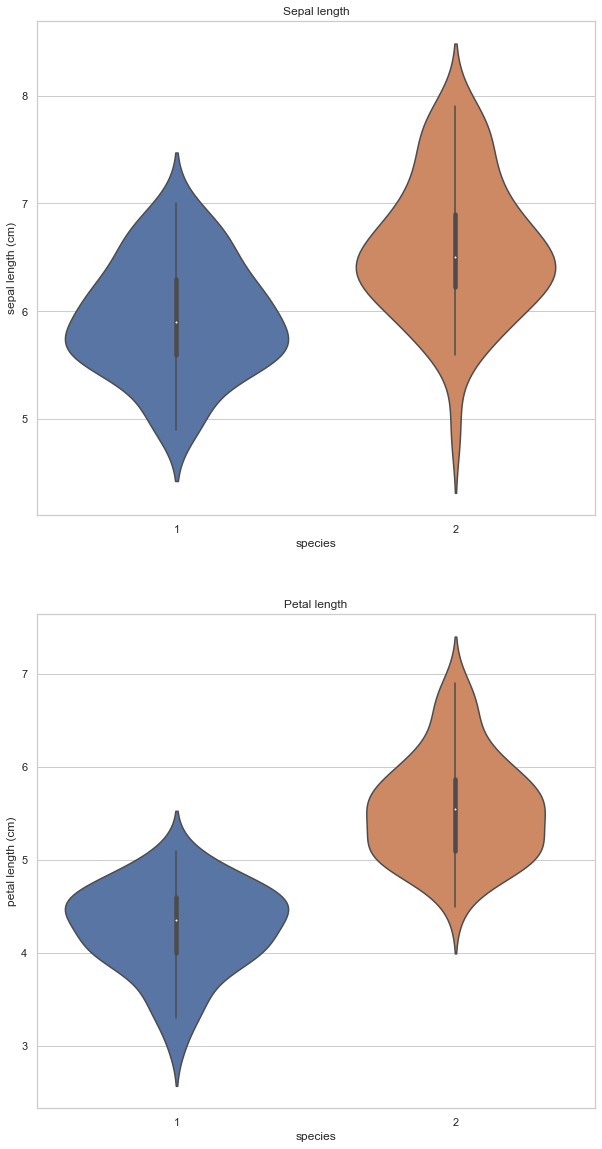

In [7]:
# Violin plot
_, axes = plt.subplots(2, 1, figsize = (10,20))
violin_plot_sepal = sns.violinplot(ax = axes[0], x = "species", y = "sepal length (cm)", data = df).set_title("Sepal length")
violin_plot_petal = sns.violinplot(ax = axes[1], x = "species", y = "petal length (cm)", data = df).set_title("Petal length")

# Problem 3

In [8]:
dfX = df[df.columns[0:2]]
dfY = df[df.columns[2]]
X = dfX.to_numpy()
Y = dfY.to_numpy()
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.25, random_state = 10)
print(X_train, X_train.shape)
print(X_test, X_test.shape)

[[7.6 6.6]
 [6.1 4. ]
 [6.4 5.3]
 [6.3 4.7]
 [5.7 5. ]
 [5.8 4. ]
 [5.4 4.5]
 [6.1 5.6]
 [7.1 5.9]
 [6.  4.5]
 [5.5 4. ]
 [5.7 4.2]
 [6.5 4.6]
 [5.7 4.5]
 [5.1 3. ]
 [5.8 3.9]
 [5.9 4.8]
 [6.3 5.1]
 [6.7 5.8]
 [6.2 4.3]
 [7.4 6.1]
 [5.8 4.1]
 [7.7 6.7]
 [7.9 6.4]
 [4.9 3.3]
 [6.4 5.5]
 [6.5 5.2]
 [6.2 5.4]
 [5.9 5.1]
 [6.4 4.3]
 [5.  3.5]
 [6.3 5. ]
 [6.3 5.6]
 [4.9 4.5]
 [5.6 4.9]
 [6.1 4.7]
 [6.3 4.9]
 [6.9 5.1]
 [6.7 5.7]
 [6.2 4.5]
 [6.7 5. ]
 [6.  4.8]
 [7.3 6.3]
 [5.5 3.7]
 [6.4 5.3]
 [6.  4. ]
 [6.4 5.6]
 [5.5 3.8]
 [7.2 6. ]
 [6.6 4.4]
 [6.1 4.7]
 [6.  5. ]
 [6.1 4.9]
 [7.7 6.1]
 [5.8 5.1]
 [5.7 4.1]
 [6.4 5.6]
 [7.7 6.7]
 [6.  5.1]
 [6.8 5.5]
 [6.5 5.8]
 [5.9 4.2]
 [5.6 4.5]
 [6.7 4.7]
 [5.5 4.4]
 [7.  4.7]
 [6.3 4.9]
 [6.6 4.6]
 [5.7 3.5]
 [6.8 5.9]
 [6.9 5.4]
 [6.  4.5]
 [5.8 5.1]
 [6.7 4.4]
 [5.2 3.9]] (75, 2)
[[5.6 3.9]
 [5.6 3.6]
 [5.  3.3]
 [6.3 4.4]
 [6.5 5.5]
 [5.5 4. ]
 [7.2 5.8]
 [6.1 4.6]
 [5.6 4.1]
 [7.7 6.9]
 [6.9 4.9]
 [6.4 4.5]
 [6.5 5.1]
 [6.3 5.6]
 [6.7 5.2]
 

# Problem 4

In [9]:
scaler = StandardScaler()
scaler.fit(X_train)
print(scaler.mean_)
print(scaler.transform(X_train))
print(scaler.transform(X_test))

[6.24533333 4.89333333]
[[ 2.03161809  2.1108781 ]
 [-0.21795903 -1.10491276]
 [ 0.2319564   0.50298267]
 [ 0.08198459 -0.23912291]
 [-0.81784626  0.13192988]
 [-0.66787445 -1.10491276]
 [-1.26776168 -0.48649144]
 [-0.21795903  0.87403546]
 [ 1.28175905  1.24508826]
 [-0.36793084 -0.48649144]
 [-1.11778988 -1.10491276]
 [-0.81784626 -0.85754423]
 [ 0.3819282  -0.36280717]
 [-0.81784626 -0.48649144]
 [-1.71767711 -2.3417554 ]
 [-0.66787445 -1.22859702]
 [-0.51790264 -0.11543865]
 [ 0.08198459  0.25561415]
 [ 0.68187182  1.12140399]
 [-0.06798722 -0.73385997]
 [ 1.73167448  1.49245678]
 [-0.66787445 -0.98122849]
 [ 2.1815899   2.23456237]
 [ 2.48153352  1.86350957]
 [-2.01762072 -1.9707026 ]
 [ 0.2319564   0.7503512 ]
 [ 0.3819282   0.37929841]
 [-0.06798722  0.62666694]
 [-0.51790264  0.25561415]
 [ 0.2319564  -0.73385997]
 [-1.86764892 -1.72333408]
 [ 0.08198459  0.13192988]
 [ 0.08198459  0.87403546]
 [-2.01762072 -0.48649144]
 [-0.96781807  0.00824562]
 [-0.21795903 -0.23912291]
 [ 0

# Problem 5

In [10]:
# n-neighbors = 5
nn5 = KNeighborsClassifier(n_neighbors=5)
nn5.fit(X_train, Y_train)
print(nn5.predict(X_test))
print(nn5.predict_proba(X_test))

[1 1 1 1 2 1 2 1 1 2 1 1 2 2 2 2 2 1 2 1 2 2 2 1 1]
[[1.  0. ]
 [1.  0. ]
 [1.  0. ]
 [1.  0. ]
 [0.  1. ]
 [1.  0. ]
 [0.  1. ]
 [1.  0. ]
 [1.  0. ]
 [0.  1. ]
 [0.8 0.2]
 [1.  0. ]
 [0.2 0.8]
 [0.  1. ]
 [0.2 0.8]
 [0.  1. ]
 [0.2 0.8]
 [0.8 0.2]
 [0.  1. ]
 [1.  0. ]
 [0.  1. ]
 [0.  1. ]
 [0.  1. ]
 [1.  0. ]
 [0.8 0.2]]


In [11]:
# n-neighbors = 3
nn3 = KNeighborsClassifier(n_neighbors=3)
nn3.fit(X_train, Y_train)
print(nn3.predict(X_test))
print(nn3.predict_proba(X_test))

[1 1 1 1 2 1 2 1 1 2 1 1 2 2 2 2 2 1 2 1 2 2 2 1 1]
[[1.         0.        ]
 [1.         0.        ]
 [1.         0.        ]
 [1.         0.        ]
 [0.         1.        ]
 [1.         0.        ]
 [0.         1.        ]
 [1.         0.        ]
 [1.         0.        ]
 [0.         1.        ]
 [0.66666667 0.33333333]
 [1.         0.        ]
 [0.33333333 0.66666667]
 [0.         1.        ]
 [0.33333333 0.66666667]
 [0.         1.        ]
 [0.         1.        ]
 [1.         0.        ]
 [0.         1.        ]
 [1.         0.        ]
 [0.         1.        ]
 [0.         1.        ]
 [0.         1.        ]
 [1.         0.        ]
 [1.         0.        ]]


In [12]:
# n-neighbors = 1
nn1 = KNeighborsClassifier(n_neighbors=1)
nn1.fit(X_train, Y_train)
print(nn1.predict(X_test))
print(nn1.predict_proba(X_test))

[1 1 1 1 2 1 2 1 1 2 2 1 2 2 1 2 2 1 2 1 2 2 2 1 1]
[[1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [0. 1.]
 [1. 0.]
 [0. 1.]
 [1. 0.]
 [1. 0.]
 [0. 1.]
 [0. 1.]
 [1. 0.]
 [0. 1.]
 [0. 1.]
 [1. 0.]
 [0. 1.]
 [0. 1.]
 [1. 0.]
 [0. 1.]
 [1. 0.]
 [0. 1.]
 [0. 1.]
 [0. 1.]
 [1. 0.]
 [1. 0.]]


# Problem 6

In [13]:
# nn5
accuracy_nn5 = accuracy_score(Y_test, nn5.predict(X_test))
precision_nn5 = precision_score(Y_test, nn5.predict(X_test))
recall_nn5 = recall_score(Y_test, nn5.predict(X_test))
f1_nn5 = f1_score(Y_test, nn5.predict(X_test))
confusion_nn5 = confusion_matrix(Y_test, nn5.predict(X_test))
print("accuracy_score:", accuracy_nn5)
print("precision_score:", precision_nn5)
print("recall_score:", recall_nn5)
print("f1_score:", f1_nn5)
print("confusion_matrix:", confusion_nn5)

accuracy_score: 0.96
precision_score: 0.9230769230769231
recall_score: 1.0
f1_score: 0.9600000000000001
confusion_matrix: [[12  0]
 [ 1 12]]


In [14]:
# nn3
accuracy_nn3 = accuracy_score(Y_test, nn3.predict(X_test))
precision_nn3 = precision_score(Y_test, nn3.predict(X_test))
recall_nn3 = recall_score(Y_test, nn3.predict(X_test))
f1_nn3 = f1_score(Y_test, nn3.predict(X_test))
confusion_nn3 = confusion_matrix(Y_test, nn3.predict(X_test))
print("accuracy_score:", accuracy_nn3)
print("precision_score:", precision_nn3)
print("recall_score:", recall_nn3)
print("f1_score:", f1_nn3)
print("confusion_matrix:", confusion_nn3)

accuracy_score: 0.96
precision_score: 0.9230769230769231
recall_score: 1.0
f1_score: 0.9600000000000001
confusion_matrix: [[12  0]
 [ 1 12]]


In [15]:
# nn1
accuracy_nn1 = accuracy_score(Y_test, nn1.predict(X_test))
precision_nn1 = precision_score(Y_test, nn1.predict(X_test))
recall_nn1 = recall_score(Y_test, nn1.predict(X_test))
f1_nn1 = f1_score(Y_test, nn1.predict(X_test))
confusion_nn1 = confusion_matrix(Y_test, nn1.predict(X_test))
print("accuracy_score:", accuracy_nn1)
print("precision_score:", precision_nn1)
print("recall_score:", recall_nn1)
print("f1_score:", f1_nn1)
print("confusion_matrix:", confusion_nn1)

accuracy_score: 0.88
precision_score: 0.8461538461538461
recall_score: 0.9166666666666666
f1_score: 0.8799999999999999
confusion_matrix: [[11  1]
 [ 2 11]]


<blockquote>
    <ul>
        <li><b>accuracy_score</b> computes the accuracy, either the fraction or the count of correct predictions. If the entire set of predicted labels for a sample strictly match with the true set of labels, then the subset accuracy is 1; otherwise it is 0.</li>
        <li><b>precision_score</b> computes the precision which is the ratio $\dfrac{tp}{tp+fp}$ where <b>tp</b> is the number of true postives and <b>fp</b> the number of false positives. The precision is intuitively the ability of the classifier not to label as positive a sample that is negative.</li>
        <li><b>recall_score</b> computes the recall which is the ratio $\dfrac{tp}{tp+fn}$ where <b>tp</b> is the number of true positives and <b>fn</b> the number of false negatives. The recall is intuitively the ability of the classifier to find all the positive samples.</li>
        <li><b>f1_score</b> is the weighted average of the precision and recall, where an F1 score reaches its best value at 1 and worst score at 0. The formula is: $F1=\dfrac{2 \times (precision \times recall)}{precision+call}$</li>
    </ul>
</blockquote>

# Problem 7

In [16]:
def decision_region(X, y, model, step=0.01, title='decision region', xlabel='xlabel', ylabel='ylabel', target_names=['versicolor', 'virginica']):
    """
    Draw the determination area of the model that learned binary classification with two-dimensional features.
    The background color is drawn from the estimated values of the trained model.
    The points on the scatter plot are training or validation data.
    Parameters
    ----------------
    X : ndarray, shape(n_samples, 2)
        Feature value
    y : ndarray, shape(n_samples,)
        label
    model : object
        Insert the installed model of the learned model
    step : float, (default : 0.1)
        Set the interval to calculate the estimate
    title : str
        Give the text of the graph Title
    xlabel, ylabel : str
        Give the text of the axis label
    target_names= : list of str
        Give a list of legends
    """
    # setting
    scatter_color = ['red', 'blue']
    contourf_color = ['pink', 'skyblue']
    n_class = 2
    # pred
    mesh_f0, mesh_f1  = np.meshgrid(np.arange(np.min(X[:,0])-0.5, np.max(X[:,0])+0.5, step), np.arange(np.min(X[:,1])-0.5, np.max(X[:,1])+0.5, step))
    mesh = np.c_[np.ravel(mesh_f0),np.ravel(mesh_f1)]
    y_pred = model.predict(mesh).reshape(mesh_f0.shape)
    # plot
    plt.title(title)
    plt.xlabel(xlabel)
    plt.ylabel(ylabel)
    plt.contourf(mesh_f0, mesh_f1, y_pred, n_class-1, cmap=ListedColormap(contourf_color))
    plt.contour(mesh_f0, mesh_f1, y_pred, n_class-1, colors='y', linewidths=3, alpha=0.5)
    for i, target in enumerate(set(y)):
        plt.scatter(X[y==target][:, 0], X[y==target][:, 1], s=80, color=scatter_color[i], label=target_names[i], marker='o')
    patches = [mpatches.Patch(color=scatter_color[i], label=target_names[i]) for i in range(n_class)]
    plt.legend(handles=patches)
    plt.legend()
    plt.show()

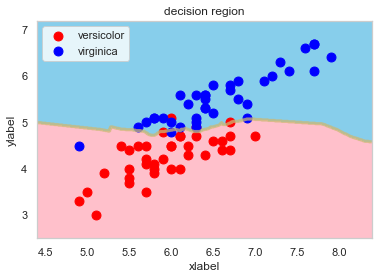

In [17]:
# Training nn5
decision_region(X_train, Y_train, nn5)

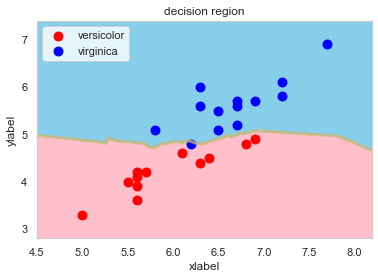

In [18]:
# Testing nn5
decision_region(X_test, Y_test, nn5)

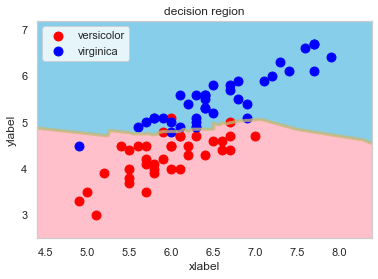

In [19]:
# Training nn3
decision_region(X_train, Y_train, nn3)

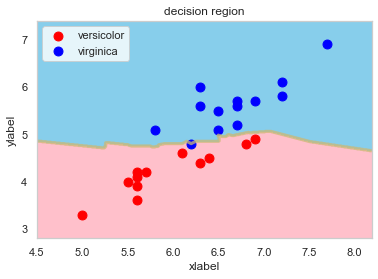

In [20]:
# Testing nn3
decision_region(X_test, Y_test, nn3)

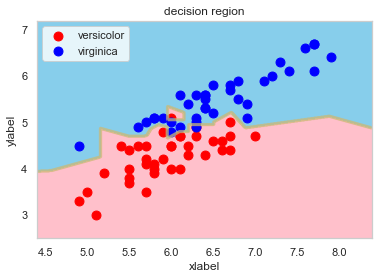

In [21]:
# Training nn1
decision_region(X_train, Y_train, nn1)

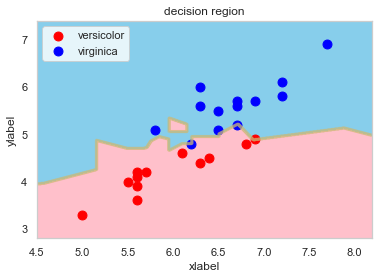

In [22]:
# Testing nn1
decision_region(X_test, Y_test, nn1)

# Problem 8

## Logistic Regression

In [23]:
# Estimate
logistic_regression = LogisticRegression()
logistic_regression.fit(X_train, Y_train)
print(logistic_regression.predict(X_test))
print(logistic_regression.predict_proba(X_test))

[1 1 1 1 2 1 2 1 1 2 1 1 2 2 2 2 2 1 2 1 2 2 2 1 1]
[[0.95486231 0.04513769]
 [0.98292772 0.01707228]
 [0.99211222 0.00788778]
 [0.83747408 0.16252592]
 [0.12364454 0.87635546]
 [0.93592463 0.06407537]
 [0.06278649 0.93721351]
 [0.71070353 0.28929647]
 [0.9156271  0.0843729 ]
 [0.0020432  0.9979568 ]
 [0.54751235 0.45248765]
 [0.79289105 0.20710895]
 [0.34901137 0.65098863]
 [0.08585204 0.91414796]
 [0.29237683 0.70762317]
 [0.07225303 0.92774697]
 [0.29321768 0.70678232]
 [0.61957306 0.38042694]
 [0.02402361 0.97597639]
 [0.88965786 0.11034214]
 [0.09807123 0.90192877]
 [0.07732056 0.92267944]
 [0.02411901 0.97588099]
 [0.88601022 0.11398978]
 [0.5665891  0.4334109 ]]


In [24]:
# Evaluation
accuracy_logi = accuracy_score(Y_test, logistic_regression.predict(X_test))
precision_logi = precision_score(Y_test, logistic_regression.predict(X_test))
recall_logi = recall_score(Y_test, logistic_regression.predict(X_test))
f1_logi = f1_score(Y_test, logistic_regression.predict(X_test))
confusion_nn1 = confusion_matrix(Y_test, logistic_regression.predict(X_test))
print("accuracy_score:", accuracy_logi)
print("precision_score:", precision_logi)
print("recall_score:", recall_logi)
print("f1_score:", f1_logi)
print("confusion_matrix:", confusion_nn1)

accuracy_score: 0.96
precision_score: 0.9230769230769231
recall_score: 1.0
f1_score: 0.9600000000000001
confusion_matrix: [[12  0]
 [ 1 12]]


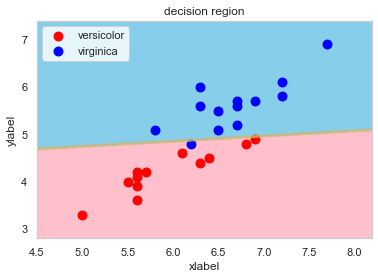

In [25]:
# Visualization
decision_region(X_test, Y_test, logistic_regression)

## SVC

In [26]:
# Estimate
svc = SVC()
svc.fit(X_train, Y_train)
print(svc.predict(X_test))

[1 1 1 1 2 1 2 1 1 2 1 1 2 2 2 2 2 1 2 1 2 2 2 1 1]


In [27]:
# Evaluation
accuracy_SVC = accuracy_score(Y_test, svc.predict(X_test))
precision_SVC = precision_score(Y_test, svc.predict(X_test))
recall_SVC = recall_score(Y_test, svc.predict(X_test))
f1_SVC = f1_score(Y_test, svc.predict(X_test))
confusion_SVC = confusion_matrix(Y_test, svc.predict(X_test))
print("accuracy_score:", accuracy_SVC)
print("precision_score:", precision_SVC)
print("recall_score:", recall_SVC)
print("f1_score:", f1_SVC)
print("confusion_matrix:", confusion_SVC)

accuracy_score: 0.96
precision_score: 0.9230769230769231
recall_score: 1.0
f1_score: 0.9600000000000001
confusion_matrix: [[12  0]
 [ 1 12]]


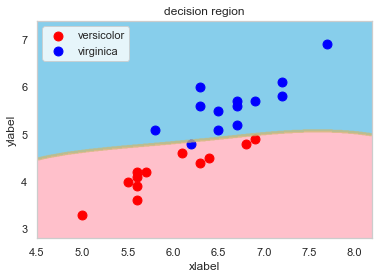

In [28]:
# Visualization
decision_region(X_test, Y_test, svc)

## DecisionTree Classifier

In [29]:
# Estimate
decision_tree_classifier = DecisionTreeClassifier()
decision_tree_classifier.fit(X_train, Y_train)
print(decision_tree_classifier.predict(X_test))

[1 1 1 1 2 1 2 1 1 2 2 1 2 2 2 2 2 2 2 1 2 2 2 1 2]


In [30]:
# Evaluation
accuracy_tree = accuracy_score(Y_test, decision_tree_classifier.predict(X_test))
precision_tree = precision_score(Y_test, decision_tree_classifier.predict(X_test))
recall_tree = recall_score(Y_test, decision_tree_classifier.predict(X_test))
f1_tree = f1_score(Y_test, decision_tree_classifier.predict(X_test))
confusion_tree = confusion_matrix(Y_test, decision_tree_classifier.predict(X_test))
print("accuracy_score:", accuracy_tree)
print("precision_score:", precision_tree)
print("recall_score:", recall_tree)
print("f1_score:", f1_tree)
print("confusion_matrix:", confusion_tree)

accuracy_score: 0.92
precision_score: 1.0
recall_score: 0.8333333333333334
f1_score: 0.9090909090909091
confusion_matrix: [[10  2]
 [ 0 13]]


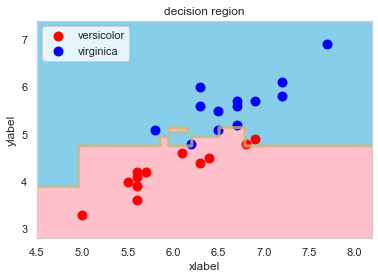

In [31]:
# Visualization
decision_region(X_test, Y_test, decision_tree_classifier)

## RandomForest Classifier

In [32]:
# Estimate
random_forest_classifier = RandomForestClassifier()
random_forest_classifier.fit(X_train, Y_train)
print(random_forest_classifier.predict(X_test))

[1 1 1 1 2 1 2 1 1 2 2 1 2 2 2 2 2 2 2 1 2 2 2 1 2]


In [33]:
# Evaluation
accuracy_forest = accuracy_score(Y_test, random_forest_classifier.predict(X_test))
precision_forest = precision_score(Y_test, random_forest_classifier.predict(X_test))
recall_forest = recall_score(Y_test, random_forest_classifier.predict(X_test))
f1_forest = f1_score(Y_test, random_forest_classifier.predict(X_test))
confusion_forest = confusion_matrix(Y_test, random_forest_classifier.predict(X_test))
print("accuracy_score:", accuracy_forest)
print("precision_score:", precision_forest)
print("recall_score:", recall_forest)
print("f1_score:", f1_forest)
print("confusion_matrix:", confusion_forest)

accuracy_score: 0.92
precision_score: 1.0
recall_score: 0.8333333333333334
f1_score: 0.9090909090909091
confusion_matrix: [[10  2]
 [ 0 13]]


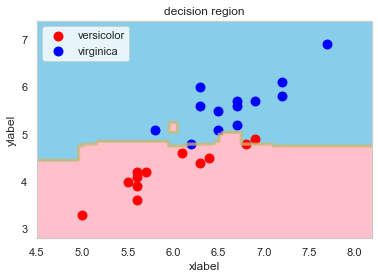

In [34]:
# Visualization
decision_region(X_test, Y_test, random_forest_classifier)

In [35]:
full_nn5 = [accuracy_nn5, precision_nn5, recall_nn5, f1_nn5]
full_logi = [accuracy_logi, precision_logi, recall_logi, f1_logi]
full_SVC = [accuracy_SVC, precision_SVC, recall_SVC, f1_SVC]
full_tree = [accuracy_tree, precision_tree, recall_tree, f1_tree]
full_forest = [accuracy_forest, precision_forest, recall_forest, f1_forest]
df_table = pd.DataFrame(columns = ["Accuracy", "Precision", "Recall", "F1"])
df_table.loc[len(df_table)] = full_nn5
df_table.loc[len(df_table)] = full_logi
df_table.loc[len(df_table)] = full_SVC
df_table.loc[len(df_table)] = full_tree
df_table.loc[len(df_table)] = full_forest
df_table.index = ["Nearest neighbor method", "Logistic regression", "SVM", "Decision tree", "Random forest"]
display(df_table)

,Accuracy,Precision,Recall,F1
Nearest neighbor method,0.96,0.923077,1.000000,0.960000
Logistic regression,0.96,0.923077,1.000000,0.960000
SVM,0.96,0.923077,1.000000,0.960000
Decision tree,0.92,1.000000,0.833333,0.909091
Random forest,0.92,1.000000,0.833333,0.909091


<blockquote>
    <ul>
        <li>Decision Tree seems to have the lowest accuracy, recall and f1 but highest precision.</li>
        <li>Nearest neighbor, logistic regression and SVM has identical results and are extremely good.</li>
        <li>Random forest has both a high accuracy and precision but lacks in recall.
    </ul>
</blockquote>